In [ ]:
# This is an example of heart-rate collection from the Fitbit Web API
# I plot below my HR doing four intervals of swimming 250 meters (10 length)

# FROM: https://www.kdnuggets.com/2020/02/using-fitbit-web-api-python.html
# IT'S CODE: https://github.com/mGalarnyk/Python_Tutorials/blob/master/Apis/Fitbit/Fitbit_API.ipynb

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import fitbit

import gather_keys_oauth2 as Oauth2
import pandas as pd 
import datetime

from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters

# Also, gather_keys_oauth2.py should be in the working directory

In [3]:
CLIENT_ID = 'XXXXX'
CLIENT_SECRET = 'xxxxxxxxx'

In [ ]:
server=Oauth2.OAuth2Server(CLIENT_ID, CLIENT_SECRET)
server.browser_authorize()
ACCESS_TOKEN=str(server.fitbit.client.session.token['access_token'])
REFRESH_TOKEN=str(server.fitbit.client.session.token['refresh_token'])
auth2_client=fitbit.Fitbit(CLIENT_ID,CLIENT_SECRET,oauth2=True,access_token=ACCESS_TOKEN,refresh_token=REFRESH_TOKEN)

In [5]:
# Collect Heart-Rate for an activity at a specific day starting and ending at specific times

oneDay = pd.datetime(year = 2021, month = 5, day = 13).date().strftime("%Y-%m-%d")
activityStart= datetime.datetime(year=2021, month=5, day=13, hour=14, minute=50)
activityEnd= datetime.datetime(year=2021, month=5, day=13, hour=15, minute=35)

In [6]:
oneDayData = auth2_client.intraday_time_series(resource='activities/heart', base_date=oneDay, detail_level='1sec')
df = pd.DataFrame(oneDayData['activities-heart-intraday']['dataset'])

df['date']=oneDay
df['date-time']=pd.to_datetime(df['date'] + ' ' + df['time'])
df = df [ (df['date-time']>activityStart)  &  (df['date-time']<activityEnd)    ]

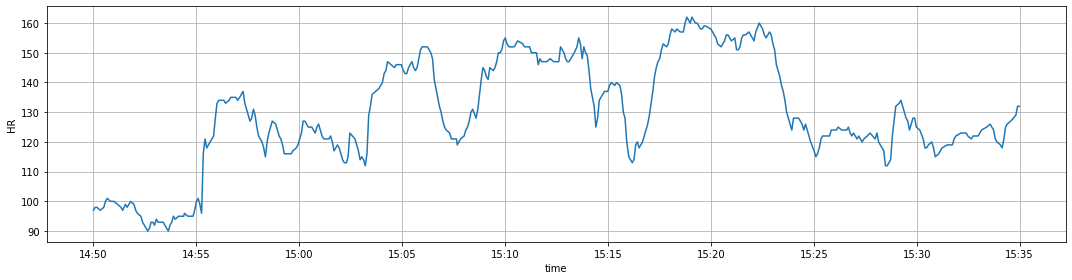

In [15]:
fig, axs = plt.subplots(figsize=(15, 4) )

myFormat = DateFormatter("%H:%M")
register_matplotlib_converters(myFormat)

axs.plot( df['date-time'], df['value']) 
axs.set_xlabel('time')
axs.set_ylabel('HR')
axs.grid(True)
axs.xaxis.set_major_formatter(myFormat)
    
fig.tight_layout()
plt.show()

In [55]:
# Marking the intervals with bar plots

bars=pd.DataFrame(  data=[ datetime.datetime(year=2021, month=5, day=13, hour=14, minute=55),   \
                      datetime.datetime(year=2021, month=5, day=13, hour=15, minute=3),    \
                      datetime.datetime(year=2021, month=5, day=13, hour=15, minute=8),    \
                      datetime.datetime(year=2021, month=5, day=13, hour=15, minute=16),
                      datetime.datetime(year=2021, month=5, day=13, hour=15, minute=25)], \
                      columns=['date-time'] )

bars['interval']=160

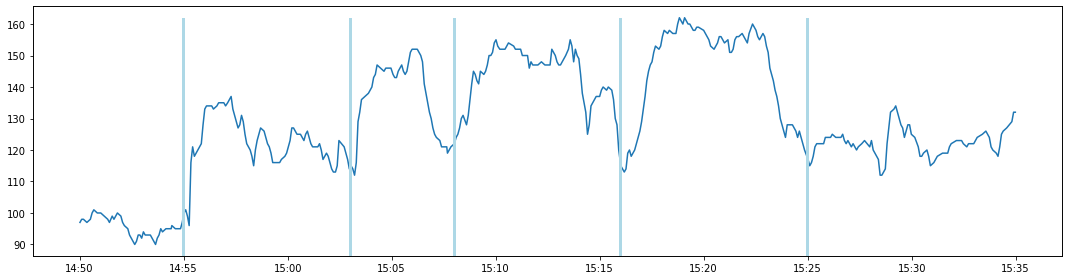

In [63]:
myFormat = DateFormatter("%H:%M")
register_matplotlib_converters(myFormat)

fig, ax = plt.subplots(figsize=(15, 4) )
barax = ax.twinx()

barax.bar( bars['date-time'], bars['interval'],width=0.0001, facecolor='lightblue') 
ax.xaxis.set_major_formatter(myFormat)
barax.set_yticks(ticks=[])

ax.plot( df['date-time'], df['value']) 
ax.xaxis.set_major_formatter(myFormat)
    
fig.tight_layout()
plt.show()

In [16]:
# Output into a file

session= pd.DataFrame(df, columns=['date','time','value'])

with pd.ExcelWriter('fitbit_interday_HR.xlsx') as writer:
     session.to_excel(writer, sheet_name='1')